<a href="https://colab.research.google.com/github/mobarakol/computer_vision_tutorial/blob/main/Stereo_Camera_Calibration_Triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SRC:https://temugeb.github.io/opencv/python/2021/02/02/stereo-camera-calibration-and-triangulation.html

In [1]:
import gdown
url = 'https://drive.google.com/uc?id=1o6OVbxi6dT0kDinmUQaBrEZBF3vz_kDp'
gdown.download(url,'frames.zip',quiet=True)
!unzip -q frames.zip

Calibrating Single View Cameras and detecting the checkerboard patterns

True
True
True
True


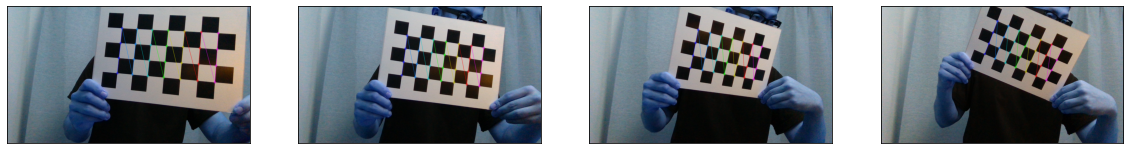

In [22]:
import cv2 as cv
import glob
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

 
images_folder = 'D2/*.png'
images_names = sorted(glob.glob(images_folder))
images = []
for imname in images_names:
    im = cv.imread(imname, 1)
    images.append(im) 

#detect the checkerboard patterns
#criteria used by checkerboard pattern detector.
#Change this if the code can't find the checkerboard
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
rows = 5 #number of checkerboard rows.
columns = 8 #number of checkerboard columns.
rows = rows - 1 # Number of interior corners along x-axis
columns = columns - 1  # Number of interior corners along y-axis

world_scaling = 1. #change this to the real world square size. Or not.
 
#coordinates of squares in the checkerboard world space
objp = np.zeros((rows*columns,3), np.float32)
objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
objp = world_scaling* objp
 
 
#frame dimensions. Frames should be the same size.
width = images[0].shape[1]
height = images[0].shape[0]
 
#Pixel coordinates of checkerboards
imgpoints = [] # 2d points in image plane.
 
#coordinates of the checkerboard in checkerboard world space.
objpoints = [] # 3d point in real world space
 
num_img = 4
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))

for idx, frame in enumerate(images):
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
    #find the checkerboard
    ret, corners = cv.findChessboardCorners(gray, (rows, columns), None)
    print(ret)
    if ret == True:
 
        #Convolution size used to improve corner detection. Don't make this too large.
        conv_size = (11, 11)
 
        #opencv can attempt to improve the checkerboard coordinates
        corners = cv.cornerSubPix(gray, corners, conv_size, (-1, -1), criteria)
        cv.drawChessboardCorners(frame, (rows,columns), corners, ret)
        ax[idx].imshow(frame)
 
        objpoints.append(objp)
        imgpoints.append(corners)

camera calibration:

In [23]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (width, height), None, None)
#RMSE: This gives the per pixel projection error. Anything under 1 is very good.
print('RMSE, camera matrix, distortion coefficients, per frame rotations and translations')
print('RMSE (per pixel projection error):\n',ret)
print('camera matrix:\n',mtx)
print('distortion:\n',dist)
print('rotations:\n',rvecs)
print('translations:\n',tvecs)

RMSE, camera matrix, distortion coefficients, per frame rotations and translations
RMSE (per pixel projection error):
 0.1307531599654111
camera matrix:
 [[903.25427917   0.         638.48657366]
 [  0.         904.85884368 358.98002034]
 [  0.           0.           1.        ]]
distortion:
 [[ 0.07131222 -0.03204121 -0.00215263 -0.0014801  -0.33213901]]
rotations:
 (array([[-0.17829269],
       [ 0.06324972],
       [-1.46666488]]), array([[ 0.02603566],
       [-0.11803582],
       [-1.43196533]]), array([[ 0.38929541],
       [-0.14875874],
       [-1.35714176]]), array([[ 0.16666014],
       [ 0.18676381],
       [-1.16207458]]))
translations:
 (array([[-0.71927962],
       [-0.08208365],
       [11.28592414]]), array([[-1.296032  ],
       [ 0.06845582],
       [12.73652845]]), array([[-1.56154795],
       [-0.50296471],
       [13.5704003 ]]), array([[-1.5574881 ],
       [-1.79488531],
       [15.25899671]]))


Combined above code for Stereo Camera:

rmse: 0.1307531599654111
camera matrix:
 [[903.25427917   0.         638.48657366]
 [  0.         904.85884368 358.98002034]
 [  0.           0.           1.        ]]
distortion coeffs: [[ 0.07131222 -0.03204121 -0.00215263 -0.0014801  -0.33213901]]
Rs:
 (array([[-0.17829269],
       [ 0.06324972],
       [-1.46666488]]), array([[ 0.02603566],
       [-0.11803582],
       [-1.43196533]]), array([[ 0.38929541],
       [-0.14875874],
       [-1.35714176]]), array([[ 0.16666014],
       [ 0.18676381],
       [-1.16207458]]))
Ts:
 (array([[-0.71927962],
       [-0.08208365],
       [11.28592414]]), array([[-1.296032  ],
       [ 0.06845582],
       [12.73652845]]), array([[-1.56154795],
       [-0.50296471],
       [13.5704003 ]]), array([[-1.5574881 ],
       [-1.79488531],
       [15.25899671]]))
rmse: 0.14812884057100467
camera matrix:
 [[985.20438947   0.         628.26829755]
 [  0.         987.01590021 360.44272756]
 [  0.           0.           1.        ]]
distortion coeffs: [[ 9.

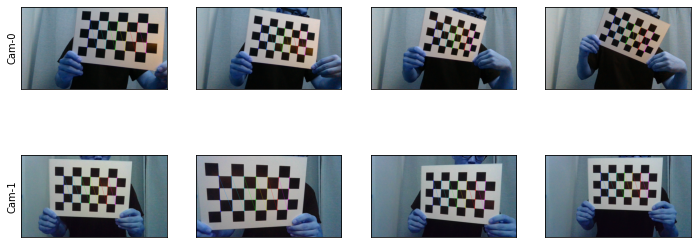

In [33]:
import cv2 as cv
import glob
import numpy as np

num_img = 4
fig, ax = plt.subplots(2, num_img, figsize=(3*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
 
def calibrate_camera(images_folder, cam=0):
    images_names = sorted(glob.glob(images_folder))
    images = []
    for imname in images_names:
        im = cv.imread(imname, 1)
        images.append(im)
 
    #criteria used by checkerboard pattern detector.
    #Change this if the code can't find the checkerboard
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
    rows = 5 #number of checkerboard rows.
    columns = 8 #number of checkerboard columns.
    rows = rows - 1 # Number of interior corners along x-axis
    columns = columns - 1  # Number of interior corners along y-axis
    world_scaling = 1. #change this to the real world square size. Or not.
 
    #coordinates of squares in the checkerboard world space
    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp
 
    #frame dimensions. Frames should be the same size.
    width = images[0].shape[1]
    height = images[0].shape[0]
 
    #Pixel coordinates of checkerboards
    imgpoints = [] # 2d points in image plane.
 
    #coordinates of the checkerboard in checkerboard world space.
    objpoints = [] # 3d point in real world space
 
 
    for idx, frame in enumerate(images):
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
        #find the checkerboard
        ret, corners = cv.findChessboardCorners(gray, (rows, columns), None)
 
        if ret == True:
 
            #Convolution size used to improve corner detection. Don't make this too large.
            conv_size = (11, 11)
 
            #opencv can attempt to improve the checkerboard coordinates
            corners = cv.cornerSubPix(gray, corners, conv_size, (-1, -1), criteria)
            cv.drawChessboardCorners(frame, (rows,columns), corners, ret)
            ax[cam, idx].imshow(frame)
 
            objpoints.append(objp)
            imgpoints.append(corners)
    ax[cam,0].set_ylabel('Cam-{}'.format(cam))
 
 
 
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (width, height), None, None)
    print('rmse:', ret)
    print('camera matrix:\n', mtx)
    print('distortion coeffs:', dist)
    print('Rs:\n', rvecs)
    print('Ts:\n', tvecs)
 
    return mtx, dist
 
mtx1, dist1 = calibrate_camera(images_folder = 'D2/*', cam = 0)
mtx2, dist2 = calibrate_camera(images_folder = 'J2/*', cam = 1)

Stereo Calibration:<br>
1. first step is to read synchronized frames from both cameras.<br>
2. again find the checkerboard patterns on the two camera frames<br>
3. calibrate the stereo camera setup<br>

The rotation matrix obtained here is the coordinate rotation matrix to go from C1 coordinate system to C2 coordinate system. The translation vector is also the location of C2 from C1. So it does not contain world coordinate rotation and translation vectors, it only provides C2 position and rotation with respect to C1. To obtain world coordinate to C2 rotation and translation, calculate as:

R2 = R * R1 and T2 = RT1 + T

One way to get R2 and T2 is to use the rotation and translation matrices obtained in single camera calibration from previous step as R1 and T1. This means your world coordinate will overlap the bottom left grid of the checkerboard in that frame. If you need absolute world coordinates, you need to determine R1 and T1 somehow. However, an even simpler choice for R1 and T1 exists. We simply overlap world coordinates with the coordinates of the first camera. This means R1 = eye(3), T1 = zeros(3) and R2 = R, T2 = T. Therefore, all triangulated 3D points are measured from the C1 camera position in the world.

True
True
True
True
0.502699513716214


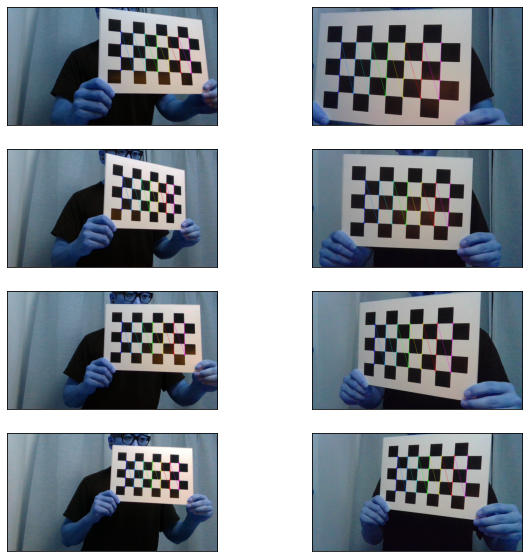

In [40]:
def stereo_calibrate(mtx1, dist1, mtx2, dist2, frames_folder):
    #read the synched frames
    images_names = glob.glob(frames_folder)
    images_names = sorted(images_names)
    c1_images_names = images_names[:len(images_names)//2]
    c2_images_names = images_names[len(images_names)//2:]
 
    c1_images = []
    c2_images = []
    for im1, im2 in zip(c1_images_names, c2_images_names):
        _im = cv.imread(im1, 1)
        c1_images.append(_im)
 
        _im = cv.imread(im2, 1)
        c2_images.append(_im)
 
    #change this if stereo calibration not good.
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
 
    rows = 5 #number of checkerboard rows.
    columns = 8 #number of checkerboard columns.
    rows = rows - 1 # Number of interior corners along x-axis
    columns = columns - 1  # Number of interior corners along y-axis
    world_scaling = 1. #change this to the real world square size. Or not.

    world_scaling = 1. #change this to the real world square size. Or not.
 
    #coordinates of squares in the checkerboard world space
    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp
 
    #frame dimensions. Frames should be the same size.
    width = c1_images[0].shape[1]
    height = c1_images[0].shape[0]
 
    #Pixel coordinates of checkerboards
    imgpoints_left = [] # 2d points in image plane.
    imgpoints_right = []
 
    #coordinates of the checkerboard in checkerboard world space.
    objpoints = [] # 3d point in real world space
 
    for idx, (frame1, frame2) in enumerate(zip(c1_images, c2_images)):
        gray1 = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
        gray2 = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
        c_ret1, corners1 = cv.findChessboardCorners(gray1, (rows, columns), None)
        c_ret2, corners2 = cv.findChessboardCorners(gray2, (rows, columns), None)
        print(c_ret1)
        if c_ret1 == True and c_ret2 == True:
            corners1 = cv.cornerSubPix(gray1, corners1, (11, 11), (-1, -1), criteria)
            corners2 = cv.cornerSubPix(gray2, corners2, (11, 11), (-1, -1), criteria)
 
            cv.drawChessboardCorners(frame1, (rows, columns), corners1, c_ret1)
            ax[idx, 0].imshow(frame1)
            # cv.imshow('img', frame1)
 
            cv.drawChessboardCorners(frame2, (rows, columns), corners2, c_ret2)
            ax[idx, 1].imshow(frame2)
            # cv.imshow('img2', frame2)
            # k = cv.waitKey(500)
 
            objpoints.append(objp)
            imgpoints_left.append(corners1)
            imgpoints_right.append(corners2)
 
    stereocalibration_flags = cv.CALIB_FIX_INTRINSIC
    ret, CM1, dist1, CM2, dist2, R, T, E, F = cv.stereoCalibrate(objpoints, imgpoints_left, imgpoints_right, mtx1, dist1,
                                                                 mtx2, dist2, (width, height), criteria = criteria, flags = stereocalibration_flags)
 
    print(ret)
    return R, T

num_img = 2
fig, ax = plt.subplots(4, num_img, figsize=(5*num_img,10), subplot_kw=dict(xticks=[],yticks=[]))
 
R, T = stereo_calibrate(mtx1, dist1, mtx2, dist2, 'synched/*')

Stereo Triangulation<br>

We are now ready to triangulate pixel coordinates from two frames into 3D coordinates. As noted in the previous section, by selecting R1 = eye(3) and T1 = zeros(3), our triangulated points will measured from the position and orientation of camera #1. <br>
1. Our first task is to select several points from both cameras to triangulate. For the images provided in the testing folder, the keypoints are hard coded.
2. The next step is to obtain the projection matrices. This is done simply by multiplying the camera matrix by the rotation and translation matrix.
3. All that is left is to triangulate each point using direct linear transform(DLT). Here I provide my code for DLT without explanation. If you want to know how DLT works, please see here for my post: link. We simply pass the keypoints from the two camera views to the DLT and obtain the triangulated point.

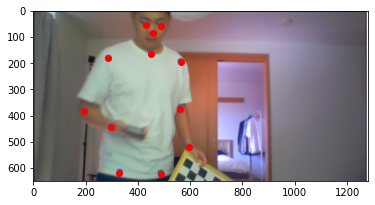

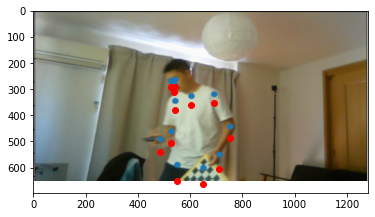

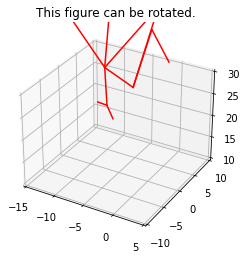

In [85]:
import urllib

def get_img_from_url(url):
    # url = 'https://github.com/TemugeB/temugeb.github.io/blob/main/_posts/images/keypoints.png'
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
    req = urllib.request.urlopen( req )
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv.imdecode(arr, -1) # 'Load it as it is'
    img = cv.cvtColor(img, cv.COLOR_RGBA2RGB)
    img1 = cv.resize(img[:255,:,:], ( 1280, 650))
    img2 = cv.resize(img[280:,:,:], ( 1280, 650))
    return img1, img2

def triangulate(mtx1, mtx2, R, T):
 
    uvs1 = [[458, 86], [451, 164], [287, 181],
            [196, 383], [297, 444], [564, 194],
            [562, 375], [596, 520], [329, 620],
            [488, 622], [432, 52], [489, 56]]
 
    uvs2 = [[540, 311], [603, 359], [542, 378],
            [525, 507], [485, 542], [691, 352],
            [752, 488], [711, 605], [549, 651],
            [651, 663], [526, 293], [542, 290]]
 
    uvs1 = np.array(uvs1)
    uvs2 = np.array(uvs2)
    
    url = 'https://github.com/TemugeB/temugeb.github.io/blob/main/_posts/images/keypoints.png?raw=true'
    frame1, frame2 = get_img_from_url(url)
 
    plt.imshow(frame1[:,:,[2,1,0]])
    plt.scatter(uvs1[:,0], uvs1[:,1], c='r')
    plt.show() #this call will cause a crash if you use cv.imshow() above. Comment out cv.imshow() to see this.
 
    plt.imshow(frame2[:,:,[2,1,0]])
    plt.scatter(uvs2[:,0], uvs2[:,1], c='r')
    plt.show()#this call will cause a crash if you use cv.imshow() above. Comment out cv.imshow() to see this
 
    #RT matrix for C1 is identity.
    RT1 = np.concatenate([np.eye(3), [[0],[0],[0]]], axis = -1)
    P1 = mtx1 @ RT1 #projection matrix for C1
 
    #RT matrix for C2 is the R and T obtained from stereo calibration.
    RT2 = np.concatenate([R, T], axis = -1)
    P2 = mtx2 @ RT2 #projection matrix for C2
 
    def DLT(P1, P2, point1, point2):
 
        A = [point1[1]*P1[2,:] - P1[1,:],
             P1[0,:] - point1[0]*P1[2,:],
             point2[1]*P2[2,:] - P2[1,:],
             P2[0,:] - point2[0]*P2[2,:]
            ]
        A = np.array(A).reshape((4,4))
 
        B = A.transpose() @ A
        from scipy import linalg
        U, s, Vh = linalg.svd(B, full_matrices = False)
 
        # print('Triangulated point: ')
        # print(Vh[3,0:3]/Vh[3,3])
        return Vh[3,0:3]/Vh[3,3]
 
    p3ds = []
    for uv1, uv2 in zip(uvs1, uvs2):
        _p3d = DLT(P1, P2, uv1, uv2)
        p3ds.append(_p3d)
    p3ds = np.array(p3ds)
 
    from mpl_toolkits.mplot3d import Axes3D
 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim3d(-15, 5)
    ax.set_ylim3d(-10, 10)
    ax.set_zlim3d(10, 30)
 
    connections = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,8], [1,9], [2,8], [5,9], [8,9], [0, 10], [0, 11]]
    for _c in connections:
        # print(p3ds[_c[0]])
        # print(p3ds[_c[1]])
        ax.plot(xs = [p3ds[_c[0],0], p3ds[_c[1],0]], ys = [p3ds[_c[0],1], p3ds[_c[1],1]], zs = [p3ds[_c[0],2], p3ds[_c[1],2]], c = 'red')
    ax.set_title('This figure can be rotated.')
    #uncomment to see the triangulated pose. This may cause a crash if youre also using cv.imshow() above.
    plt.show()

 
#this call might cause segmentation fault error. This is due to calling cv.imshow() and plt.show()
triangulate(mtx1, mtx2, R, T)

All Together:

rmse: 0.13075315996540485
camera matrix:
 [[903.25427872   0.         638.48657147]
 [  0.         904.8588431  358.98001997]
 [  0.           0.           1.        ]]
distortion coeffs: [[ 0.07131222 -0.03204117 -0.00215263 -0.0014801  -0.33213907]]
Rs:
 (array([[ 0.38929541],
       [-0.14875874],
       [-1.35714176]]), array([[ 0.02603566],
       [-0.11803581],
       [-1.43196533]]), array([[ 0.16666014],
       [ 0.18676381],
       [-1.16207458]]), array([[-0.17829269],
       [ 0.06324972],
       [-1.46666488]]))
Ts:
 (array([[-1.56154792],
       [-0.5029647 ],
       [13.57040029]]), array([[-1.29603197],
       [ 0.06845582],
       [12.73652845]]), array([[-1.55748807],
       [-1.7948853 ],
       [15.2589967 ]]), array([[-0.71927959],
       [-0.08208365],
       [11.28592413]]))
rmse: 0.14812884057100387
camera matrix:
 [[985.20438914   0.         628.2682974 ]
 [  0.         987.0158999  360.44272739]
 [  0.           0.           1.        ]]
distortion coeffs: [[ 9

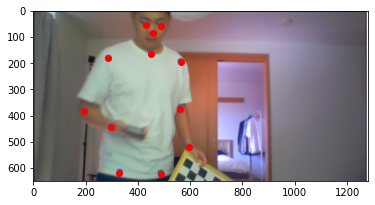

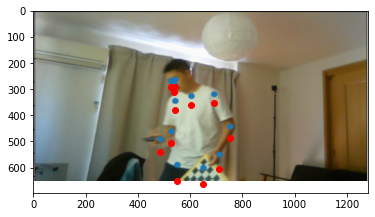

Triangulated point: 
[-4.64143027 -4.03755082 27.84617951]
Triangulated point: 
[-5.96817895 -2.36688193 34.53425903]
Triangulated point: 
[-19.62788834  -1.69746063  54.61508956]
Triangulated point: 
[-40.78875137  14.60490304  88.91888969]
Triangulated point: 
[-14.05178051   7.61433692  40.01586408]
Triangulated point: 
[-1.52979467 -1.93969503 31.55557953]
Triangulated point: 
[-2.09378599  4.4888552  40.00796156]
Triangulated point: 
[-0.75012468  7.50931809 31.68863127]
Triangulated point: 
[-15.48774051  17.00626362  48.39859084]
Triangulated point: 
[-5.748741   13.26488714 39.09995288]
Triangulated point: 
[-5.65079193 -4.91594399 28.78022233]
Triangulated point: 
[-3.37409965 -4.51700539 25.67568239]
[-4.64143027 -4.03755082 27.84617951]
[-5.96817895 -2.36688193 34.53425903]
[-5.96817895 -2.36688193 34.53425903]
[-19.62788834  -1.69746063  54.61508956]
[-19.62788834  -1.69746063  54.61508956]
[-40.78875137  14.60490304  88.91888969]
[-40.78875137  14.60490304  88.91888969]
[-

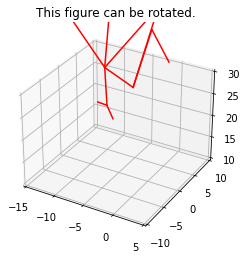

In [90]:
import cv2 as cv
import glob
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
 
 
def calibrate_camera(images_folder):
    images_names = glob.glob(images_folder)
    images = []
    for imname in images_names:
        im = cv.imread(imname, 1)
        images.append(im)
 
    # plt.figure(figsize = (10,10))
    # ax = [plt.subplot(2,2,i+1) for i in range(4)]
    #
    # for a, frame in zip(ax, images):
    #     a.imshow(frame[:,:,[2,1,0]])
    #     a.set_xticklabels([])
    #     a.set_yticklabels([])
    # plt.subplots_adjust(wspace=0, hspace=0)
    # plt.show()
 
    #criteria used by checkerboard pattern detector.
    #Change this if the code can't find the checkerboard
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
    rows = 5 #number of checkerboard rows.
    columns = 8 #number of checkerboard columns.
    rows = rows - 1 # Number of interior corners along x-axis
    columns = columns - 1  # Number of interior corners along y-axis
    world_scaling = 1. #change this to the real world square size. Or not.
 
    #coordinates of squares in the checkerboard world space
    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp
 
    #frame dimensions. Frames should be the same size.
    width = images[0].shape[1]
    height = images[0].shape[0]
 
    #Pixel coordinates of checkerboards
    imgpoints = [] # 2d points in image plane.
 
    #coordinates of the checkerboard in checkerboard world space.
    objpoints = [] # 3d point in real world space
 
 
    for frame in images:
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
        #find the checkerboard
        ret, corners = cv.findChessboardCorners(gray, (rows, columns), None)
 
        if ret == True:
 
            #Convolution size used to improve corner detection. Don't make this too large.
            conv_size = (11, 11)
 
            #opencv can attempt to improve the checkerboard coordinates
            corners = cv.cornerSubPix(gray, corners, conv_size, (-1, -1), criteria)
            cv.drawChessboardCorners(frame, (rows,columns), corners, ret)
            # cv.imshow('img', frame)
            # cv.waitKey(500)
 
            objpoints.append(objp)
            imgpoints.append(corners)
 
 
 
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (width, height), None, None)
    print('rmse:', ret)
    print('camera matrix:\n', mtx)
    print('distortion coeffs:', dist)
    print('Rs:\n', rvecs)
    print('Ts:\n', tvecs)
 
    return mtx, dist
 
def stereo_calibrate(mtx1, dist1, mtx2, dist2, frames_folder):
    #read the synched frames
    images_names = glob.glob(frames_folder)
    images_names = sorted(images_names)
    c1_images_names = images_names[:len(images_names)//2]
    c2_images_names = images_names[len(images_names)//2:]
 
    c1_images = []
    c2_images = []
    for im1, im2 in zip(c1_images_names, c2_images_names):
        _im = cv.imread(im1, 1)
        c1_images.append(_im)
 
        _im = cv.imread(im2, 1)
        c2_images.append(_im)
 
    #change this if stereo calibration not good.
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
 
    rows = 5 #number of checkerboard rows.
    columns = 8 #number of checkerboard columns.
    rows = rows - 1 # Number of interior corners along x-axis
    columns = columns - 1  # Number of interior corners along y-axis
    world_scaling = 1. #change this to the real world square size. Or not.
 
    #coordinates of squares in the checkerboard world space
    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp
 
    #frame dimensions. Frames should be the same size.
    width = c1_images[0].shape[1]
    height = c1_images[0].shape[0]
 
    #Pixel coordinates of checkerboards
    imgpoints_left = [] # 2d points in image plane.
    imgpoints_right = []
 
    #coordinates of the checkerboard in checkerboard world space.
    objpoints = [] # 3d point in real world space
 
    for frame1, frame2 in zip(c1_images, c2_images):
        gray1 = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
        gray2 = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
        c_ret1, corners1 = cv.findChessboardCorners(gray1, (rows, columns), None)
        c_ret2, corners2 = cv.findChessboardCorners(gray2, (rows, columns), None)
 
        if c_ret1 == True and c_ret2 == True:
            corners1 = cv.cornerSubPix(gray1, corners1, (11, 11), (-1, -1), criteria)
            corners2 = cv.cornerSubPix(gray2, corners2, (11, 11), (-1, -1), criteria)
 
            cv.drawChessboardCorners(frame1, (rows, columns), corners1, c_ret1)
            # cv.imshow('img', frame1)
 
            cv.drawChessboardCorners(frame2, (rows, columns), corners2, c_ret2)
            # cv.imshow('img2', frame2)
            # cv.waitKey(500)
 
            objpoints.append(objp)
            imgpoints_left.append(corners1)
            imgpoints_right.append(corners2)
 
    stereocalibration_flags = cv.CALIB_FIX_INTRINSIC
    ret, CM1, dist1, CM2, dist2, R, T, E, F = cv.stereoCalibrate(objpoints, imgpoints_left, imgpoints_right, mtx1, dist1,
                                                                 mtx2, dist2, (width, height), criteria = criteria, flags = stereocalibration_flags)
 
    print(ret)
    return R, T
 
def triangulate(mtx1, mtx2, R, T):
 
    uvs1 = [[458, 86], [451, 164], [287, 181],
            [196, 383], [297, 444], [564, 194],
            [562, 375], [596, 520], [329, 620],
            [488, 622], [432, 52], [489, 56]]
 
    uvs2 = [[540, 311], [603, 359], [542, 378],
            [525, 507], [485, 542], [691, 352],
            [752, 488], [711, 605], [549, 651],
            [651, 663], [526, 293], [542, 290]]
 
    uvs1 = np.array(uvs1)
    uvs2 = np.array(uvs2)
 
 
    # frame1 = cv.imread('testing/_C1.png')
    # frame2 = cv.imread('testing/_C2.png')
    url = 'https://github.com/TemugeB/temugeb.github.io/blob/main/_posts/images/keypoints.png?raw=true'
    frame1, frame2 = get_img_from_url(url)
 
    plt.imshow(frame1[:,:,[2,1,0]])
    plt.scatter(uvs1[:,0], uvs1[:,1], c='r')
    plt.show() #this call will cause a crash if you use cv.imshow() above. Comment out cv.imshow() to see this.
 
    plt.imshow(frame2[:,:,[2,1,0]])
    plt.scatter(uvs2[:,0], uvs2[:,1], c='r')
    plt.show()#this call will cause a crash if you use cv.imshow() above. Comment out cv.imshow() to see this
 
    #RT matrix for C1 is identity.
    RT1 = np.concatenate([np.eye(3), [[0],[0],[0]]], axis = -1)
    P1 = mtx1 @ RT1 #projection matrix for C1
 
    #RT matrix for C2 is the R and T obtained from stereo calibration.
    RT2 = np.concatenate([R, T], axis = -1)
    P2 = mtx2 @ RT2 #projection matrix for C2
 
    def DLT(P1, P2, point1, point2):
 
        A = [point1[1]*P1[2,:] - P1[1,:],
             P1[0,:] - point1[0]*P1[2,:],
             point2[1]*P2[2,:] - P2[1,:],
             P2[0,:] - point2[0]*P2[2,:]
            ]
        A = np.array(A).reshape((4,4))
        #print('A: ')
        #print(A)
 
        B = A.transpose() @ A
        from scipy import linalg
        U, s, Vh = linalg.svd(B, full_matrices = False)
 
        print('Triangulated point: ')
        print(Vh[3,0:3]/Vh[3,3])
        return Vh[3,0:3]/Vh[3,3]
 
    p3ds = []
    for uv1, uv2 in zip(uvs1, uvs2):
        _p3d = DLT(P1, P2, uv1, uv2)
        p3ds.append(_p3d)
    p3ds = np.array(p3ds)
 
    from mpl_toolkits.mplot3d import Axes3D
 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim3d(-15, 5)
    ax.set_ylim3d(-10, 10)
    ax.set_zlim3d(10, 30)
 
    connections = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,8], [1,9], [2,8], [5,9], [8,9], [0, 10], [0, 11]]
    for _c in connections:
        print(p3ds[_c[0]])
        print(p3ds[_c[1]])
        ax.plot(xs = [p3ds[_c[0],0], p3ds[_c[1],0]], ys = [p3ds[_c[0],1], p3ds[_c[1],1]], zs = [p3ds[_c[0],2], p3ds[_c[1],2]], c = 'red')
    ax.set_title('This figure can be rotated.')
    #uncomment to see the triangulated pose. This may cause a crash if youre also using cv.imshow() above.
    plt.show()
 
 
mtx1, dist1 = calibrate_camera(images_folder = 'D2/*')
mtx2, dist2 = calibrate_camera(images_folder = 'J2/*')
 
R, T = stereo_calibrate(mtx1, dist1, mtx2, dist2, 'synched/*')
 
#this call might cause segmentation fault error. This is due to calling cv.imshow() and plt.show()
triangulate(mtx1, mtx2, R, T)